# Analisando dataset 4i

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [47]:
df = pd.read_excel(r'Datasets/dados_Tiago_IC.xlsx')
df.head()

,data_tidy,c_credito,ici,icc,massa_real,pim,pmc,pmc_a,pop_des,pop_ea,pop_ocu,pmr_diesel,pmr_gasolina,pib,rend_medio,saldo_caged,saldo_total,cambio_brl_uds,taxa_desemprego,taxa_selic
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.42,NaN,NaN,10.37
1,2000-02-01,NaN,NaN,NaN,NaN,NaN,46.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.95,NaN,NaN,16.97
2,2000-03-01,NaN,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.55,NaN,NaN,15.68
3,2000-04-01,NaN,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.17,NaN,NaN,12.26
4,2000-05-01,NaN,NaN,NaN,NaN,NaN,50.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.70,NaN,NaN,18.38


In [48]:
# Criando colunas de mês e ano
df['mes'] = df['data_tidy'].dt.month
df['ano'] = df['data_tidy'].dt.year
df.drop(columns=['data_tidy'], inplace=True)

,c_credito,ici,icc,massa_real,pim,pmc,pmc_a,pop_des,pop_ea,pop_ocu,...,pmr_gasolina,pib,rend_medio,saldo_caged,saldo_total,cambio_brl_uds,taxa_desemprego,taxa_selic,mes,ano
0,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.42,NaN,NaN,10.37,1,2000
1,NaN,NaN,NaN,NaN,NaN,46.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23.95,NaN,NaN,16.97,2,2000
2,NaN,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33.55,NaN,NaN,15.68,3,2000
3,NaN,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.17,NaN,NaN,12.26,4,2000
4,NaN,NaN,NaN,NaN,NaN,50.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.70,NaN,NaN,18.38,5,2000


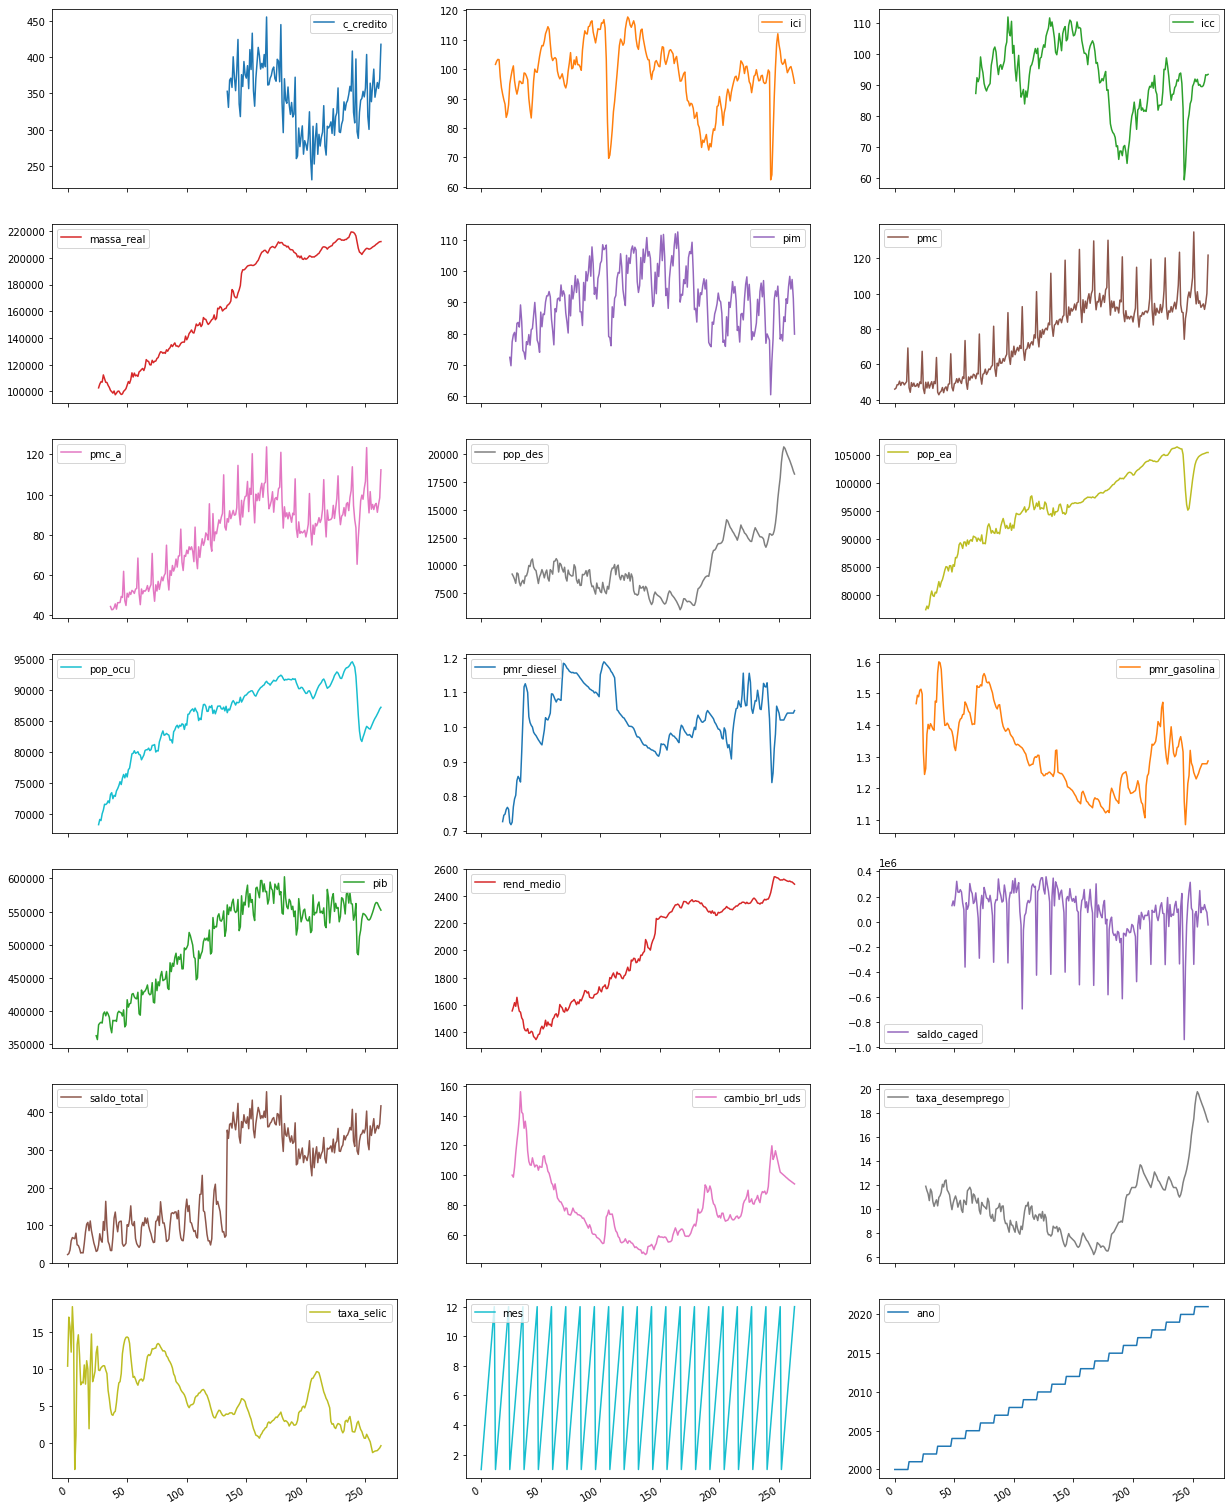

In [49]:
#plotando gráfico de todas colunas
df.plot(subplots=True, layout=(7,3), figsize=(21,30))
plt.show()

Por mais que todas as colunas contenham valores numéricos as colunas "mes" e "ano" contêm valores classificativos, então pode ser interessante separar em "dummies", isso será testado

In [84]:
df_dummies = pd.get_dummies(df, columns=['mes','ano'])
df_dummies.tail()

,c_credito,ici,icc,massa_real,pim,pmc,pmc_a,pop_des,pop_ea,pop_ocu,...,ano_2012,ano_2013,ano_2014,ano_2015,ano_2016,ano_2017,ano_2018,ano_2019,ano_2020,ano_2021
259,355.2111,100.4905,89.7376,210072.2131,98.3625,94.2585,95.5900,19442.1295,105168.4257,85726.2962,...,0,0,0,0,0,0,0,0,0,1
260,364.9780,100.8675,90.9918,210624.8286,94.2936,91.1369,91.1521,19150.8210,105245.4201,86094.5992,...,0,0,0,0,0,0,0,0,0,1
261,356.8786,99.3789,93.2515,211469.0057,97.3519,94.6552,95.0317,18841.4721,105332.8583,86491.3862,...,0,0,0,0,0,0,0,0,0,1
262,370.0965,97.4153,93.1183,211978.1016,91.2658,100.1936,98.3641,18488.4549,105425.4993,86937.0443,...,0,0,0,0,0,0,0,0,0,1
263,417.5694,95.2229,93.3670,212094.6518,79.8382,121.8431,112.2972,18216.7615,105417.3988,87200.6372,...,0,0,0,0,0,0,0,0,0,1


Uma vez que há uma discrepância muito alta na escala dos valores de cada coluno, todas serão reescalonadas entre 0 e 1

In [85]:
df_scaler = MinMaxScaler()
df_scaler.fit(df_dummies)

column_names = df_dummies.columns

df_scaled = df_scaler.transform(df_dummies)
df_scaled = pd.DataFrame(df_scaled, columns=column_names)
df_scaled.head()

,c_credito,ici,icc,massa_real,pim,pmc,pmc_a,pop_des,pop_ea,pop_ocu,...,ano_2012,ano_2013,ano_2014,ano_2015,ano_2016,ano_2017,ano_2018,ano_2019,ano_2020,ano_2021
0,NaN,NaN,NaN,NaN,NaN,0.034709,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,0.040133,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,0.061826,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,0.061826,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,0.083519,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plotando variável alvo junto com as demais, pode ser útil para decidir visualmente quais variáveis seguem uma mesma tendência

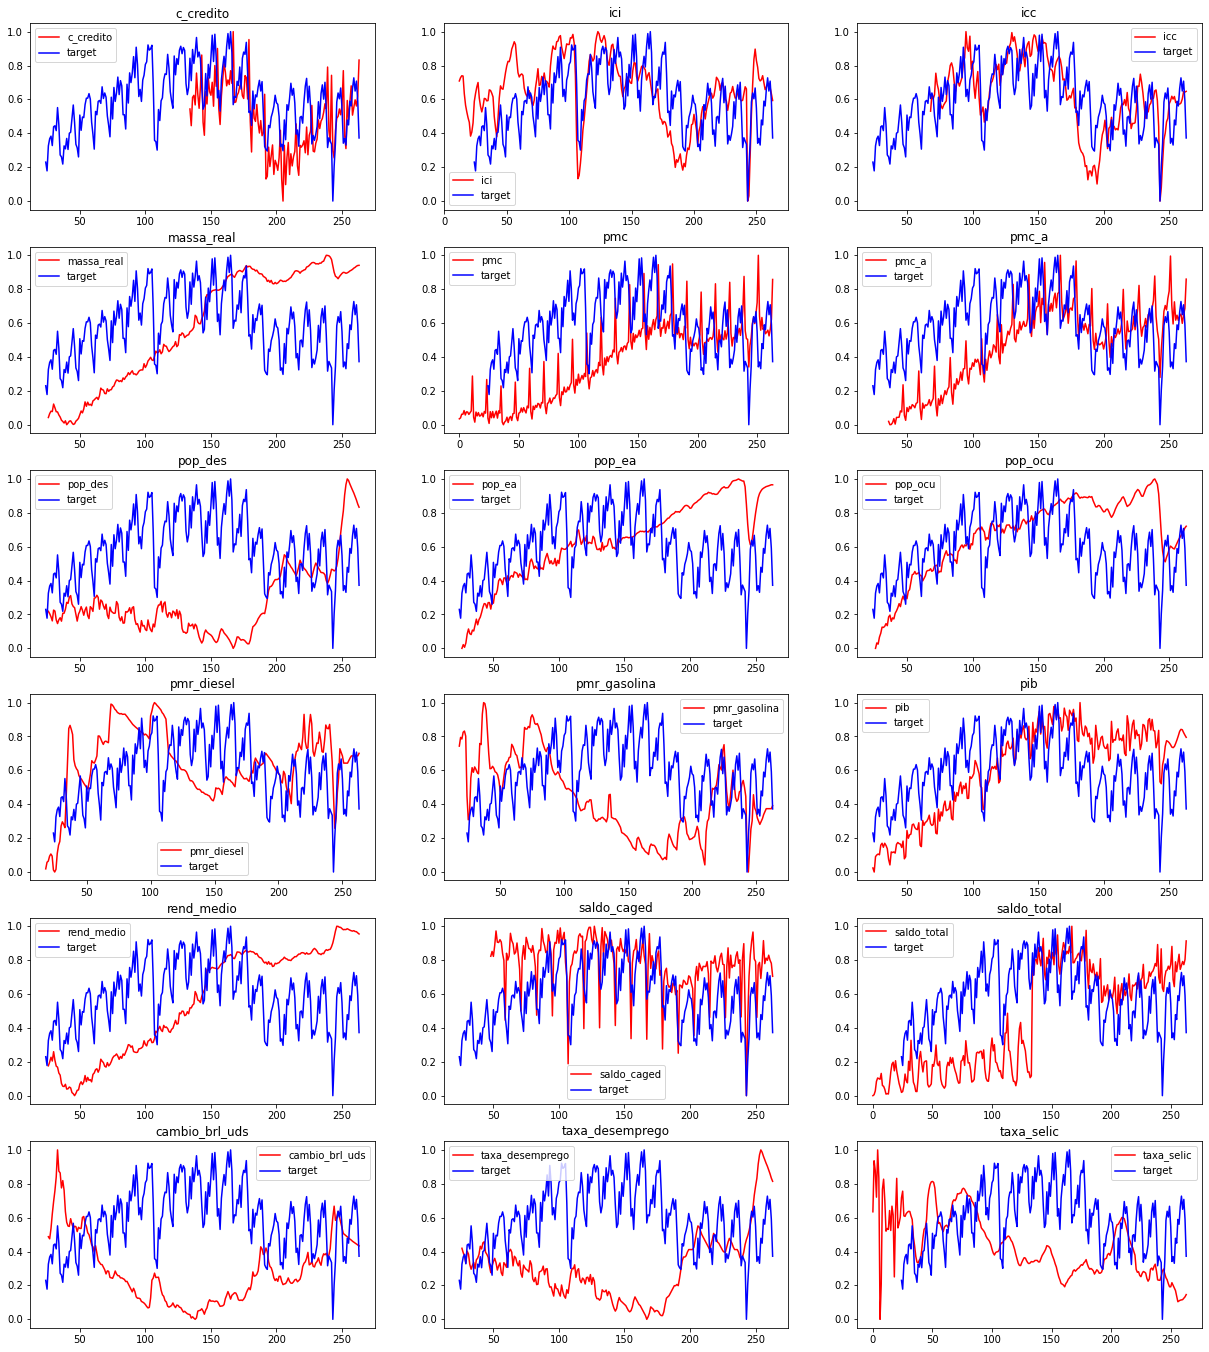

In [86]:
def plot_col_target(columns_plot, target_plot):
    fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(21,24))

    i = 0 #controlar as linhas
    j = 0 #controlar as colunas

    for column in columns_plot:
        ax[i][j].plot(df_scaled[column], color='red', label=column)
        ax[i][j].plot(df_scaled[target_plot], color='blue', label='target')
        ax[i][j].legend()
        ax[i][j].set_title(column)
        j +=1
        if j==3:
            j = 0
            i += 1
            
            
# separando colunas para plotar junto com a variável alvo
columns_plot = ['c_credito','ici','icc','massa_real','pmc','pmc_a','pop_des','pop_ea','pop_ocu','pmr_diesel','pmr_gasolina',
               'pib','rend_medio','saldo_caged','saldo_total','cambio_brl_uds','taxa_desemprego','taxa_selic']
target_plot = ['pim']

plot_col_target(columns_plot, target_plot)

Testar como os dados do mês "x" influenciam, a princípio graficamente, no "pmi" do mês "x+1", ou seja como os dados de hoje se relacionam com o resultado do mês que vem

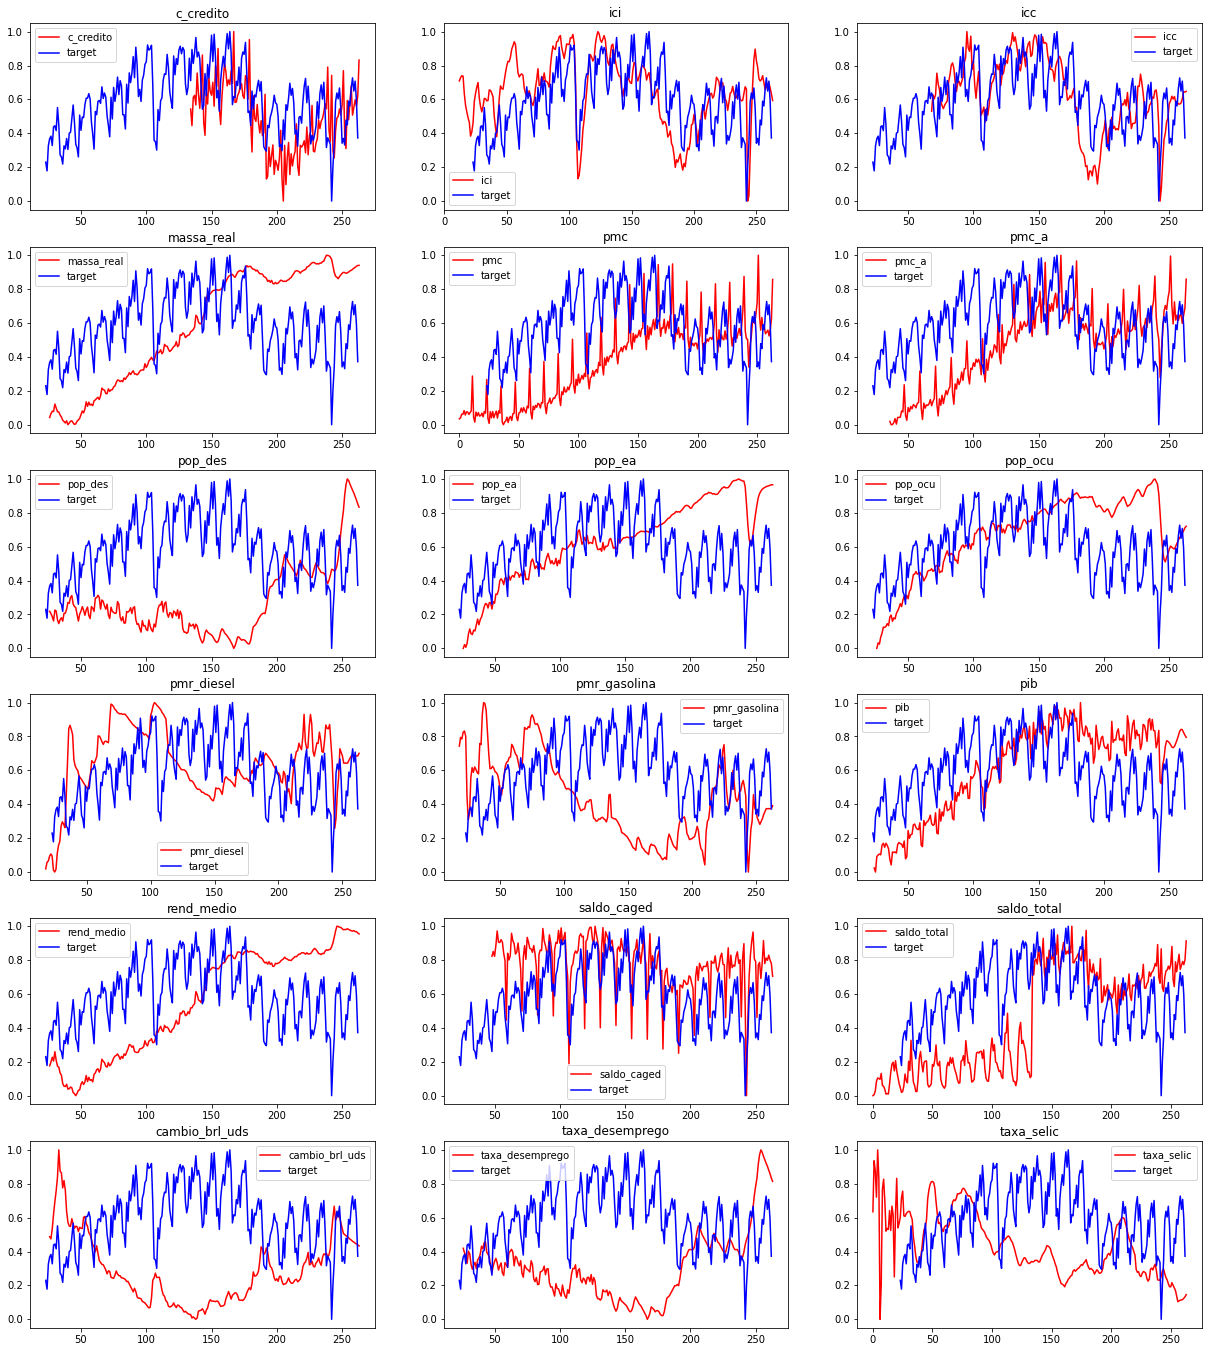

In [88]:
target_t1 = df_scaled['pim'].shift(-1)
df_scaled['target_t1'] = target_t1

target_plot = ['target_t1']

plot_col_target(columns_plot, target_plot)

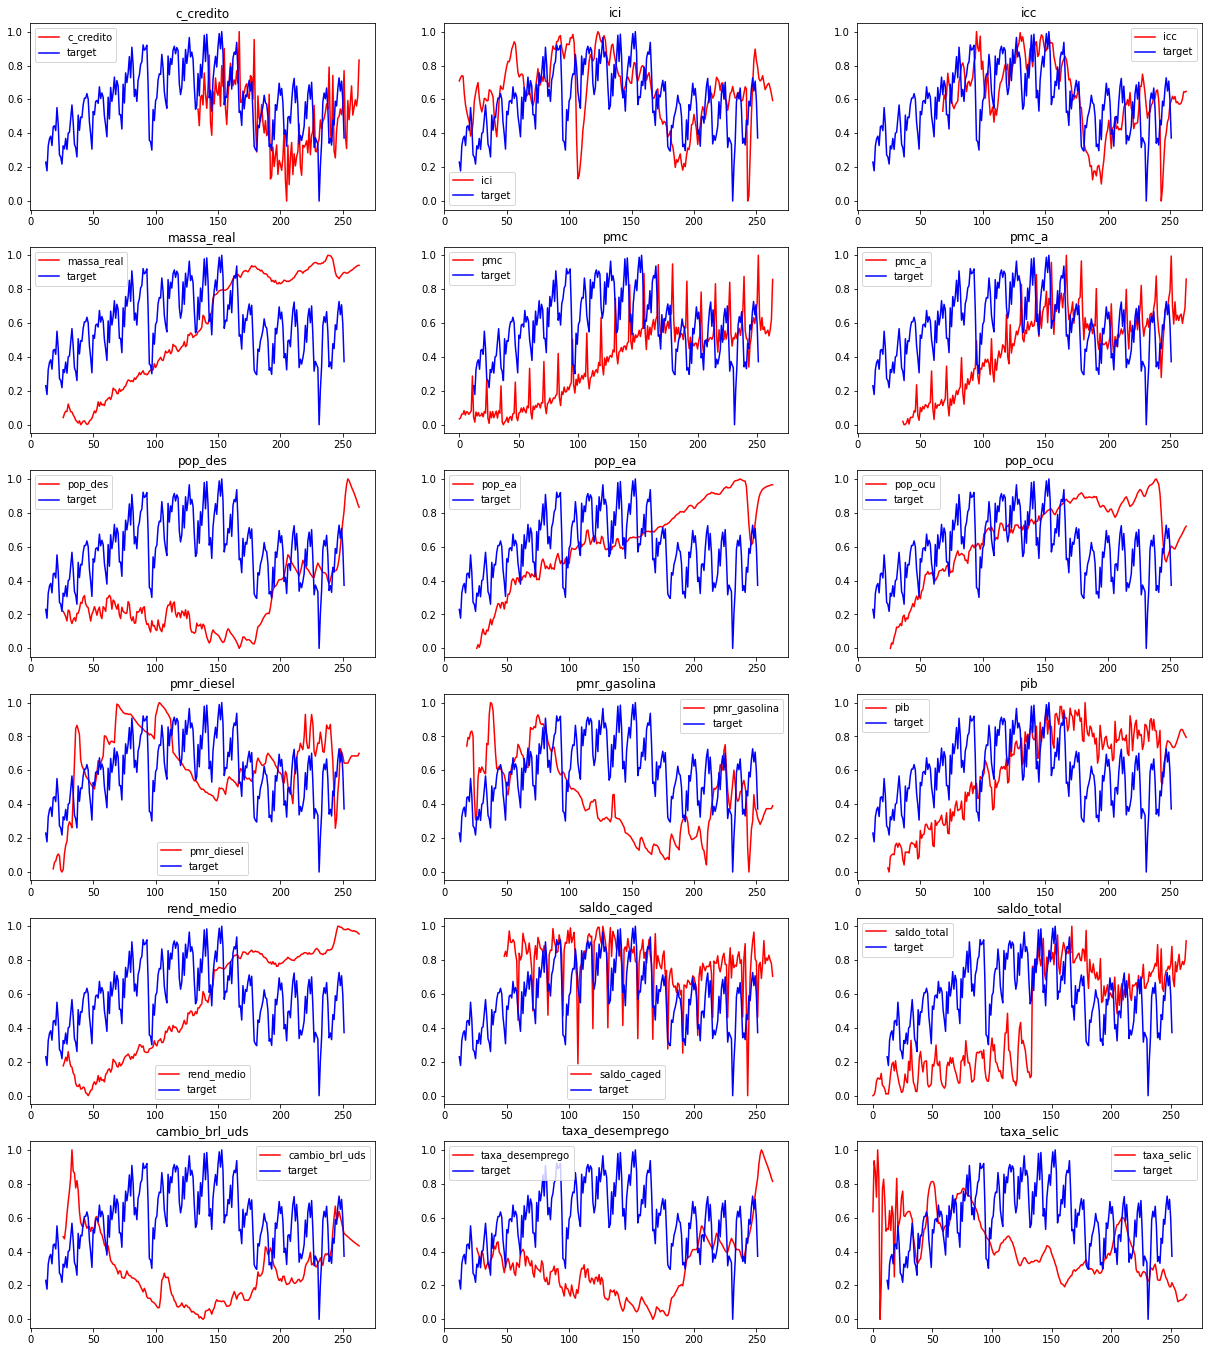

In [89]:
# testando com 1 ano de "diferença"
target_t1 = df_scaled['pim'].shift(-12)
df_scaled['target_t1'] = target_t1

target_plot = ['target_t1']

plot_col_target(columns_plot, target_plot)